# Yield Prediction Model

In [401]:
import pandas as pd
import numpy as np

### Yield Data

In [402]:
df_yield = pd.read_csv('../data/raw/yield.csv')
df_yield.shape

(18188, 12)

In [403]:
df_yield.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value
0,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2000,2000,kg/ha,596.8
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2001,2001,kg/ha,1000.0
2,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2002,2002,kg/ha,1461.9
3,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2003,2003,kg/ha,888.9
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2004,2004,kg/ha,920.6


In [404]:
df_yield.tail()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value
18183,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111,Wheat,2019,2019,kg/ha,3914.9
18184,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111,Wheat,2020,2020,kg/ha,4779.6
18185,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111,Wheat,2021,2021,kg/ha,5075.9
18186,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111,Wheat,2022,2022,kg/ha,5154.2
18187,QCL,Crops and livestock products,716,Zimbabwe,5412,Yield,111,Wheat,2023,2023,kg/ha,4553.8


Renaming the value and area column

In [405]:
df_yield = df_yield.rename(index = str, columns = {"Value" : "kg/ha_yield"})
df_yield = df_yield.rename(index = str, columns = { "Area" : "Country"})
df_yield.head()

,Domain Code,Domain,Area Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,kg/ha_yield
0,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2000,2000,kg/ha,596.8
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2001,2001,kg/ha,1000.0
2,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2002,2002,kg/ha,1461.9
3,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2003,2003,kg/ha,888.9
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,115,Barley,2004,2004,kg/ha,920.6


Only keep columns I

In [406]:
columns_to_keep = ['Country', 'Item', 'Year', 'kg/ha_yield']
df_yield = df_yield[columns_to_keep]
df_yield.head()

,Country,Item,Year,kg/ha_yield
0,Afghanistan,Barley,2000,596.8
1,Afghanistan,Barley,2001,1000.0
2,Afghanistan,Barley,2002,1461.9
3,Afghanistan,Barley,2003,888.9
4,Afghanistan,Barley,2004,920.6


In [407]:
df_yield.describe()

,Year,kg/ha_yield
count,18188.000000,18188.000000
mean,2011.549208,6606.414817
std,6.923380,8390.728206
min,2000.000000,0.100000
25%,2006.000000,1750.000000
50%,2012.000000,3197.200000
75%,2018.000000,7014.900000
max,2023.000000,75298.700000


In [408]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18188 entries, 0 to 18187
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      18188 non-null  object 
 1   Item         18188 non-null  object 
 2   Year         18188 non-null  int64  
 3   kg/ha_yield  18188 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 710.5+ KB


### Precipitation Data

Since the precipitation data is an excel file I will have to install openpyxl to open it

In [409]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [410]:
df_precip = pd.read_excel("../data/raw/precipitation.xlsx")
df_precip.shape
df_precip.head()

,code,name,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,...,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07
0,ABW,Aruba (Neth.),420.90,420.90,420.90,420.90,420.90,420.90,420.90,420.90,...,283.10,294.30,444.50,375.60,467.20,218.30,394.20,420.90,420.90,420.90
1,AFG,Afghanistan,295.12,289.55,332.98,317.55,294.36,313.38,322.88,331.50,...,306.36,391.00,360.97,299.95,275.08,389.01,387.33,229.67,305.34,297.90
2,AGO,Angola,1021.01,1037.61,1060.21,980.49,978.48,1066.87,1019.88,1021.85,...,1056.25,1005.24,1031.24,1066.84,1056.37,1063.34,1069.64,1057.38,1057.57,1053.91
3,AIA,Anguilla (U.K.),1228.00,1096.70,1028.90,1072.00,1097.20,1017.90,970.50,1034.10,...,1164.50,630.00,1089.30,1154.50,949.70,1002.70,1041.20,891.50,964.60,1055.70
4,ALB,Albania,1273.36,1190.41,1089.64,1129.17,1105.44,1231.38,1125.82,1046.73,...,1427.53,1130.50,1200.73,1089.43,1022.04,1292.29,1074.47,1214.74,995.29,1178.65


As you can see, the precipitation data is in wide format (years as columns), so we need to change it to long format (one row per country-year)

In [411]:
df_precip_2 = df_precip.melt(id_vars=["code", "name"], 
                  var_name="year", 
                  value_name="average_rain/year(mm)")
df_precip_2.head()

,code,name,year,average_rain/year(mm)
0,ABW,Aruba (Neth.),1901-07,420.90
1,AFG,Afghanistan,1901-07,295.12
2,AGO,Angola,1901-07,1021.01
3,AIA,Anguilla (U.K.),1901-07,1228.00
4,ALB,Albania,1901-07,1273.36


In [412]:
df_precip_2.shape

(29151, 4)

Change the Year format from YYYY/MM to just YYYY

In [413]:
df_precip_2["year"] = df_precip_2["year"].astype(str).str.extract(r"(\d{4})").astype(int)
df_precip_2.head()

,code,name,year,average_rain/year(mm)
0,ABW,Aruba (Neth.),1901,420.90
1,AFG,Afghanistan,1901,295.12
2,AGO,Angola,1901,1021.01
3,AIA,Anguilla (U.K.),1901,1228.00
4,ALB,Albania,1901,1273.36


Change name column to Country and year to Year

In [414]:
df_precip_2 = df_precip_2.rename(columns={"name": "Country"})
df_precip_2 = df_precip_2.rename(columns={"year": "Year"})
df_precip_2.head()

,code,Country,Year,average_rain/year(mm)
0,ABW,Aruba (Neth.),1901,420.90
1,AFG,Afghanistan,1901,295.12
2,AGO,Angola,1901,1021.01
3,AIA,Anguilla (U.K.),1901,1228.00
4,ALB,Albania,1901,1273.36


Drop code column

In [415]:
df_precip_2 = df_precip_2.drop(columns = 'code')
df_precip_2.head()

,Country,Year,average_rain/year(mm)
0,Aruba (Neth.),1901,420.90
1,Afghanistan,1901,295.12
2,Angola,1901,1021.01
3,Anguilla (U.K.),1901,1228.00
4,Albania,1901,1273.36


In [416]:
df_precip_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29151 entries, 0 to 29150
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                29151 non-null  object 
 1   Year                   29151 non-null  int64  
 2   average_rain/year(mm)  28905 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 683.4+ KB


check for NA values

In [417]:
df_precip_2.isna().sum()

Country                    0
Year                       0
average_rain/year(mm)    246
dtype: int64

drop na rows

In [418]:
df_precip_2 = df_precip_2.dropna(subset=["average_rain/year(mm)"])
df_precip_2.isna().sum()

Country                  0
Year                     0
average_rain/year(mm)    0
dtype: int64

Merge the yield and precipitation data frames on 'Year' and 'Country'

In [419]:
merged_df = pd.merge(df_yield, df_precip_2, on = ['Year', 'Country'])
merged_df.head()

,Country,Item,Year,kg/ha_yield,average_rain/year(mm)
0,Afghanistan,Barley,2000,596.8,247.82
1,Afghanistan,Barley,2001,1000.0,246.47
2,Afghanistan,Barley,2002,1461.9,313.37
3,Afghanistan,Barley,2003,888.9,342.27
4,Afghanistan,Barley,2004,920.6,313.17


In [420]:
merged_df.shape

(15575, 5)

In [421]:
merged_df.describe()

,Year,kg/ha_yield,average_rain/year(mm)
count,15575.000000,15575.000000,15575.000000
mean,2011.603146,6647.738491,1058.542386
std,6.911956,8445.570952,723.115466
min,2000.000000,0.100000,15.060000
25%,2006.000000,1747.100000,538.250000
50%,2012.000000,3171.900000,895.150000
75%,2018.000000,7017.900000,1503.850000
max,2023.000000,75298.700000,4105.000000


### Temperature Data

We have to do a similar procedure for the temperature data as we did for the precipitation data

In [422]:
df_temp = pd.read_excel("../data/raw/temperature.xlsx")
df_temp.head()

,code,name,1901-07,1902-07,1903-07,1904-07,1905-07,1906-07,1907-07,1908-07,...,2014-07,2015-07,2016-07,2017-07,2018-07,2019-07,2020-07,2021-07,2022-07,2023-07
0,ABW,Aruba (Neth.),28.22,27.79,27.89,27.62,27.68,27.58,27.56,27.46,...,29.46,29.68,29.71,29.27,28.95,29.33,29.34,29.04,28.81,29.39
1,AFG,Afghanistan,12.79,13.00,11.82,12.14,12.03,12.52,11.90,12.22,...,13.20,13.78,14.26,13.88,14.18,13.80,13.19,14.34,14.51,14.67
2,AGO,Angola,21.32,21.36,21.37,21.28,21.32,21.20,21.22,21.29,...,21.56,21.69,21.94,21.84,21.66,21.76,21.72,21.73,21.62,21.51
3,AIA,Anguilla (U.K.),27.19,26.77,26.81,26.34,26.69,26.45,26.11,26.25,...,27.97,28.22,28.15,27.96,27.70,28.08,28.04,27.96,27.73,28.35
4,ALB,Albania,11.36,11.14,11.64,11.56,11.41,11.45,11.21,11.06,...,13.12,13.00,12.90,12.81,13.49,13.47,13.17,12.84,13.44,13.86


In [423]:
df_temp_2 = df_temp.melt(id_vars=["code", "name"], 
                  var_name="year", 
                  value_name="average_temp/year(c)")
df_temp_2["year"] = df_temp_2["year"].astype(str).str.extract(r"(\d{4})").astype(int)
df_temp_2 = df_temp_2.rename(columns={"name": "Country"})
df_temp_2 = df_temp_2.rename(columns={"year": "Year"})
df_temp_2 = df_temp_2.drop(columns = 'code')
df_temp_2.head()

,Country,Year,average_temp/year(c)
0,Aruba (Neth.),1901,28.22
1,Afghanistan,1901,12.79
2,Angola,1901,21.32
3,Anguilla (U.K.),1901,27.19
4,Albania,1901,11.36


Check for missing values

In [424]:
df_temp_2.isna().sum()

Country                   0
Year                      0
average_temp/year(c)    246
dtype: int64

Drop rows with NA values

In [425]:
df_temp_2 = df_temp_2.dropna(subset=["average_temp/year(c)"])


Merge the yield, precipitation, and temperature data together

In [426]:
merged_df_2 = pd.merge(merged_df, df_temp_2, on = ['Year', 'Country'] )
merged_df_2.head()

,Country,Item,Year,kg/ha_yield,average_rain/year(mm),average_temp/year(c)
0,Afghanistan,Barley,2000,596.8,247.82,13.61
1,Afghanistan,Barley,2001,1000.0,246.47,13.95
2,Afghanistan,Barley,2002,1461.9,313.37,13.79
3,Afghanistan,Barley,2003,888.9,342.27,13.26
4,Afghanistan,Barley,2004,920.6,313.17,13.91


In [427]:
merged_df_2.shape

(15575, 6)

### Pesticide Data

Modify the data frame similiar to the yield data frame

In [428]:
df_pest = pd.read_csv("../data/raw/pesticide.csv")
df_pest.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46
2,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2002,2002,kg/ha,0.47
3,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2003,2003,kg/ha,0.49
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2004,2004,kg/ha,0.51


In [429]:
df_pest = df_pest.rename(index = str, columns = {"Value" : "kg/ha_pest"})
df_pest = df_pest.rename(index = str, columns = { "Area" : "Country"})
columns_to_keep = ['Country', 'Year', 'kg/ha_pest']
df_pest= df_pest[columns_to_keep]
df_pest.head()

,Country,Year,kg/ha_pest
0,Albania,2000,0.44
1,Albania,2001,0.46
2,Albania,2002,0.47
3,Albania,2003,0.49
4,Albania,2004,0.51


### Final Data Frame

In [430]:
final_df = pd.merge(merged_df_2, df_pest, on = ['Year', 'Country'], how = 'inner')
final_df.head()

,Country,Item,Year,kg/ha_yield,average_rain/year(mm),average_temp/year(c),kg/ha_pest
0,Albania,Barley,2000,1500.0,808.80,12.85,0.44
1,Albania,Barley,2001,2500.0,934.52,12.44,0.46
2,Albania,Barley,2002,4750.0,1192.63,12.66,0.47
3,Albania,Barley,2003,1871.0,1068.01,12.40,0.49
4,Albania,Barley,2004,2466.7,1165.07,12.09,0.51


check for null values

In [431]:
final_df.isnull().sum()

Country                  0
Item                     0
Year                     0
kg/ha_yield              0
average_rain/year(mm)    0
average_temp/year(c)     0
kg/ha_pest               0
dtype: int64

In [432]:
final_df.dtypes

Country                   object
Item                      object
Year                       int64
kg/ha_yield              float64
average_rain/year(mm)    float64
average_temp/year(c)     float64
kg/ha_pest               float64
dtype: object

Let's save our cleaned data to a CSV file

In [433]:
final_df.to_csv("../data/processed/cleaned_crop_data.csv", index = False)

### Exploratory Data Analysis

In [434]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14414 entries, 0 to 14413
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                14414 non-null  object 
 1   Item                   14414 non-null  object 
 2   Year                   14414 non-null  int64  
 3   kg/ha_yield            14414 non-null  float64
 4   average_rain/year(mm)  14414 non-null  float64
 5   average_temp/year(c)   14414 non-null  float64
 6   kg/ha_pest             14414 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 788.4+ KB


In [435]:
final_df.shape

(14414, 7)

In [436]:
final_df.groupby('Item').count()

,Country,Year,kg/ha_yield,average_rain/year(mm),average_temp/year(c),kg/ha_pest
Item,,,,,,
Barley,1913,1913,1913,1913,1913,1913
Maize (corn),3055,3055,3055,3055,3055,3055
Potatoes,2957,2957,2957,2957,2957,2957
Rice,2276,2276,2276,2276,2276,2276
Soya beans,1862,1862,1862,1862,1862,1862
Wheat,2351,2351,2351,2351,2351,2351


In [437]:
final_df.describe()

,Year,kg/ha_yield,average_rain/year(mm),average_temp/year(c),kg/ha_pest
count,14414.000000,14414.000000,14414.000000,14414.000000,14414.000000
mean,2011.093104,6522.676100,1073.471713,18.363304,3.119186
std,6.622096,8307.420354,714.725945,7.910414,5.083630
min,2000.000000,0.100000,15.060000,-4.870000,0.000000
25%,2005.000000,1736.150000,559.100000,11.450000,0.330000
50%,2011.000000,3133.750000,916.350000,20.840000,1.230000
75%,2017.000000,6897.175000,1509.410000,25.120000,3.770000
max,2022.000000,54000.300000,4105.000000,30.040000,37.910000


Let's check the number of unique values for each column in the data frame

In [438]:
final_df.nunique()

Country                    152
Item                         6
Year                        23
kg/ha_yield              12734
average_rain/year(mm)     3413
average_temp/year(c)      1719
kg/ha_pest                1013
dtype: int64

Here are 5 countries with the highest yield

In [439]:
final_df.groupby(['Country'], sort = True)['kg/ha_yield'].sum().nlargest(5)

Country
United States of America    1688280.7
New Zealand                 1686786.0
France                      1659541.7
Belgium                     1628486.1
Germany                     1537061.0
Name: kg/ha_yield, dtype: float64

Here is the highest yield country for each item in the data set

In [440]:
idx = final_df.groupby('Item')['kg/ha_yield'].idxmax()
final_df.loc[idx, ['Item', 'Country', 'kg/ha_yield']]

,Item,Country,kg/ha_yield
9899,Barley,Oman,14227.1
9922,Maize (corn),Oman,39405.7
1318,Potatoes,Belgium,54000.3
8816,Rice,Morocco,11351.1
13441,Soya beans,Türkiye,4420.6
6378,Wheat,Ireland,10667.7


Our data is caluclated from 2000 to 2022

In [441]:
final_df['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

All the countries in the data frame

In [442]:
final_df['Country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Denmark', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Eritrea', 'Estonia', 'Eswatini',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhs

Let's see how yield has changed acoss countries

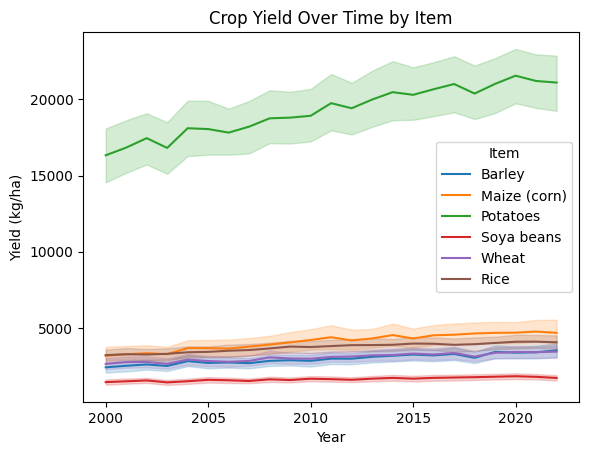

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=final_df, x="Year", y="kg/ha_yield", hue="Item")
plt.title("Crop Yield Over Time by Item")
plt.ylabel("Yield (kg/ha)")
plt.show()

Potatoes have the highest yield by far (likely due to yield being measured in kg/ha)

Other crops like Maize, Wheat, Rice, Barley, and Soya beans show gradual improvement or stability

Yields are rising over time for most crops, but growth rates differ

This kind of trend supports predictive modeling over time

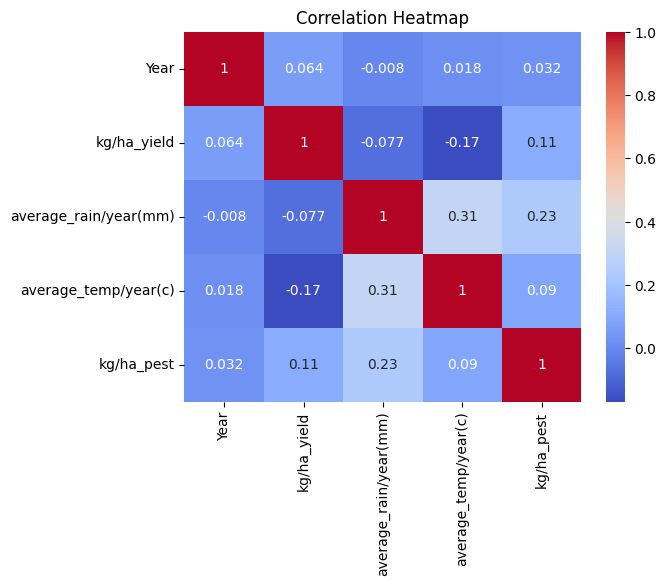

In [444]:
# If necessary: convert object columns to numeric or drop non-numeric ones
numeric_df = final_df.select_dtypes(include=["float64", "int64"])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Weak but visible correlation between yield and:
- Pesticide use
- Precipitation
- Temperature

There is no single strong linear predictor of yield. All features have low correlation

This data sggests a non-linear model (like Random Forest or Gradient Boosting) may perform better than a linear regression

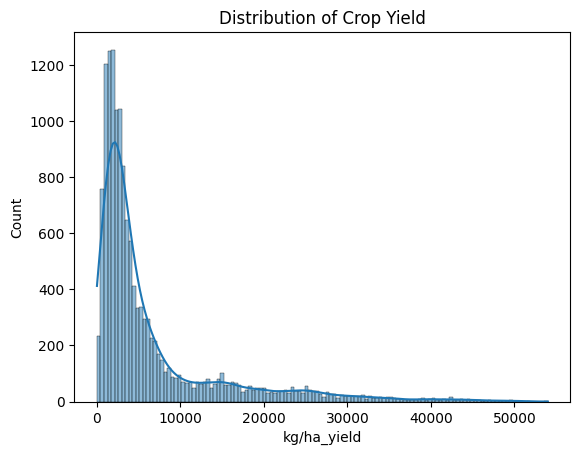

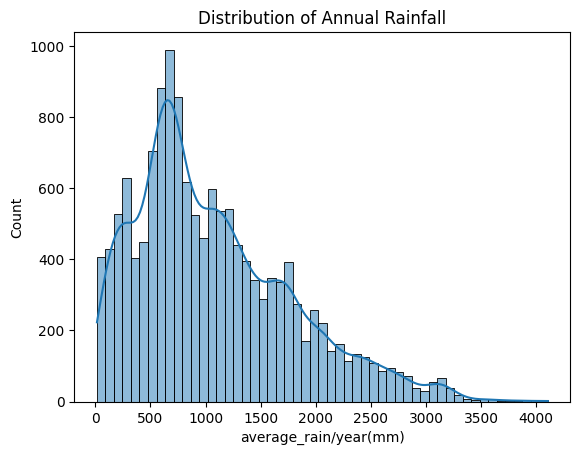

In [445]:
sns.histplot(final_df['kg/ha_yield'], kde=True)
plt.title("Distribution of Crop Yield")
plt.show()

sns.histplot(final_df['average_rain/year(mm)'], kde=True)
plt.title("Distribution of Annual Rainfall")
plt.show()


Distribution of Crop Yield (kg/ha)
- Most crops yield under 10,000 kg/ha, but some (like Potatoes) reach up to ~50,000+
- Suggests a log transformation might help normalize the target for linear models

Distribution of Annual Rainfall (mm)
- most values concentrated below 1500 mm
- few regions receive very high rainfall (3000+ mm)

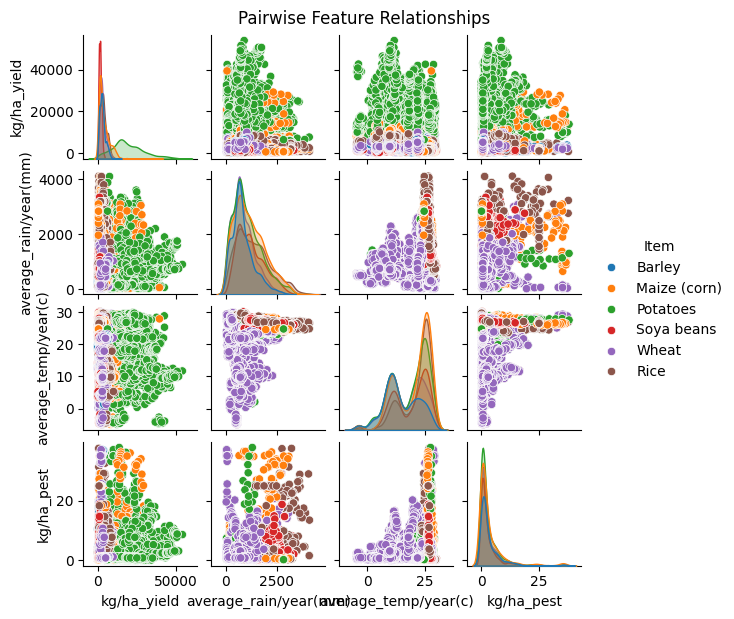

In [446]:
sns.pairplot(final_df[["kg/ha_yield", "average_rain/year(mm)", "average_temp/year(c)", "kg/ha_pest","Item"]],
             hue = "Item",
             height = 1.5,
             aspect = 1)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

- Rice and Soya beans cluster lower on yield and rainfall.
- Wheat and Maize spread across temperature and pesticide ranges more broadly.

### Building Models

Most machine learning models  require numerical input. They can’t process strings like "India" or "Wheat".

Let’s say you have a column:        Item: [ Wheat , Rice, Maize ]

One-hot encoding converts it to: 

Item_Wheat | Item_Rice | Item_Maize

      1     |     0     |     0

      0     |     1     |     0

      0     |     0     |     1
Same applies to "Area" or "Country".

In [463]:
# copy of original data frame to work on
df_encoded = final_df.copy()

# Apply one-hot encoding to 'Country' and 'Item'
df_encoded = pd.get_dummies(final_df, columns=['Country', 'Item'], prefix=['Country', 'Item'])
one_hot_cols = [col for col in df_encoded.columns if col.startswith('Country_') or col.startswith('Item_')]
df_encoded[one_hot_cols] = df_encoded[one_hot_cols].astype(int)

# features and label
features = df_encoded.drop(columns=["kg/ha_yield"])
y = final_df["kg/ha_yield"]

features.head()

,Year,average_rain/year(mm),average_temp/year(c),kg/ha_pest,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,...,Country_Uruguay,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Item_Barley,Item_Maize (corn),Item_Potatoes,Item_Rice,Item_Soya beans,Item_Wheat
0,2000,808.80,12.85,0.44,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2001,934.52,12.44,0.46,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2002,1192.63,12.66,0.47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2003,1068.01,12.40,0.49,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2004,1165.07,12.09,0.51,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [464]:
features = features.drop(columns = 'Year')
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14414 entries, 0 to 14413
Columns: 161 entries, average_rain/year(mm) to Item_Wheat
dtypes: float64(3), int64(158)
memory usage: 17.7 MB


In [465]:
features.head()

,average_rain/year(mm),average_temp/year(c),kg/ha_pest,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Uruguay,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Item_Barley,Item_Maize (corn),Item_Potatoes,Item_Rice,Item_Soya beans,Item_Wheat
0,808.80,12.85,0.44,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,934.52,12.44,0.46,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1192.63,12.66,0.47,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1068.01,12.40,0.49,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1165.07,12.09,0.51,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Scaling

In [467]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ["average_rain/year(mm)", "average_temp/year(c)", "kg/ha_pest"]
features[numeric_cols] = scaler.fit_transform(features[numeric_cols])
features[numeric_cols]

,average_rain/year(mm),average_temp/year(c),kg/ha_pest
0,0.194071,0.507591,0.011606
1,0.224810,0.495846,0.012134
2,0.287919,0.502148,0.012398
3,0.257449,0.494701,0.012925
4,0.281180,0.485821,0.013453
...,...,...,...
14409,0.151697,0.771985,0.017146
14410,0.175440,0.779719,0.018201
14411,0.163582,0.767688,0.017673
14412,0.151484,0.766256,0.018465


In [470]:
features.head()

,average_rain/year(mm),average_temp/year(c),kg/ha_pest,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Uruguay,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Item_Barley,Item_Maize (corn),Item_Potatoes,Item_Rice,Item_Soya beans,Item_Wheat
0,0.194071,0.507591,0.011606,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.224810,0.495846,0.012134,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.287919,0.502148,0.012398,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.257449,0.494701,0.012925,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.281180,0.485821,0.013453,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Training

We will now split the dataset to two datasets, a training dataset and test dataset. Common splits for training and testing are 80/20 and 70/30.

The training dataset is the  dataset used to train the Machine Learning algorithms.

The test dataset, is used to check how well the ML algorithms trained with the training dataset. 

In [471]:
features.shape

(14414, 161)

In [472]:
y.shape

(14414,)

Splitting the data into training and testing

In [454]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, y, test_size=0.25, random_state=13)

Creating and Comparing Models

In [455]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def compare_models(model):
    model_name = model.__class__.__name__
    model.fit(train_data, train_labels)
    y_pred = model.predict(test_data)
    
    r2 = r2_score(test_labels, y_pred)
    mse = mean_squared_error(test_labels, y_pred)
    rmse = mse ** 0.5 
    mae = mean_absolute_error(test_labels, y_pred)
    
    return [model_name, round(r2, 4), round(rmse, 2), round(mae, 2)]

In [456]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=13),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=13),
    SVR(),
    DecisionTreeRegressor()
]

In [457]:
model_results = list(map(compare_models, models))

In [458]:
print("Model\t\t\t    R²\t      RMSE\t  MAE")
for name, r2, rmse, mae in model_results:
    print(f"{name:25} {r2:<10} {rmse:<10} {mae}")

Model			    R²	      RMSE	  MAE
GradientBoostingRegressor 0.8753     3003.88    1838.68
RandomForestRegressor     0.7381     4353.05    2635.85
SVR                       -0.124     9017.73    4754.83
DecisionTreeRegressor     0.923      2360.6     1054.93


The evaluation metrics used are **R² (coefficient of determination)**, **Root Mean Squared Error (RMSE)**, and **Mean Absolute Error (MAE)**.

R² represents the proportion of the variance in crop yield that is predictable from the input variables (such as temperature, rainfall, and pesticide use). It is a statistical measure between 0 and 1, where 1 means the model perfectly predicts the variance, and 0 means it predicts none.
This metric helps determine how well the regression model fits the actual data points.

We also use:

**RMSE**, which gives an estimate of how much error is present in the model’s predictions, penalizing large errors more strongly.

**MAE**, which gives the average size of prediction errors in the same units as the target variable (kg/ha), making it easy to interpret.

From the results shown above, the **Decision Tree Regressor** has the highest R² score, meaning it explains 92% of the variance in crop yields. It also has the lowest RMSE and lowest MAE , making it the best-performing model overall.
The **Gradient Boosting Regressor** comes in second, with an R² of **0.8753**, RMSE of **3003.93**, and MAE of **1838.68**, indicating strong performance as well.

The **Random Forest Regressor** and **SVR (Support Vector Regressor)** performed less effectively, with SVR showing a negative R² value, indicating it failed to capture the relationship between features and yield in this dataset.

We will also calculate **Adjusted R²**, which is similar to R² but accounts for the number of features in the model. If irrelevant variables are added, Adjusted R² will decrease, providing a more honest measure of model performance. It is always less than or equal to R².

In [459]:
df_encoded = df_encoded.drop(columns = 'Year')

In [460]:
df_encoded.head()

,kg/ha_yield,average_rain/year(mm),average_temp/year(c),kg/ha_pest,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,...,Country_Uruguay,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Item_Barley,Item_Maize (corn),Item_Potatoes,Item_Rice,Item_Soya beans,Item_Wheat
0,1500.0,808.80,12.85,0.44,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2500.0,934.52,12.44,0.46,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4750.0,1192.63,12.66,0.47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1871.0,1068.01,12.40,0.49,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2466.7,1165.07,12.09,0.51,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [461]:
# Reconstruct test DataFrame with original column names
test_df = pd.DataFrame(test_data, columns=features.columns)

# Extract country and item columns
country_cols = [col for col in test_df.columns if col.startswith("Country_")]
item_cols = [col for col in test_df.columns if col.startswith("Item_")]

# Reverse one-hot encoding using idxmax
test_df['Country'] = test_df[country_cols].idxmax(axis=1).str.replace('Country_', '')
test_df['Item'] = test_df[item_cols].idxmax(axis=1).str.replace('Item_', '')

# Drop the one-hot columns if you don't need them
test_df.drop(columns=country_cols + item_cols, inplace=True)

C:\Users\glenn\AppData\Local\Temp\ipykernel_14456\2076024176.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df['Country'] = test_df[country_cols].idxmax(axis=1).str.replace('Country_', '')
C:\Users\glenn\AppData\Local\Temp\ipykernel_14456\2076024176.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df['Item'] = test_df[item_cols].idxmax(axis=1).str.replace('Item_', '')


In [475]:
test_df.head()

,average_rain/year(mm),average_temp/year(c),kg/ha_pest,Country,Item
13639,0.298880,0.812948,0.006858,Uganda,Rice
10822,0.204027,0.587511,0.231865,Portugal,Wheat
12464,0.563407,0.902893,0.177790,Suriname,Soya beans
8476,0.166144,0.744486,0.024004,Mexico,Maize (corn)
8197,0.076309,0.976797,0.000000,Mali,Soya beans


In [ ]:
# fit the model
clf = DecisionTreeRegressor(random_state=13)
clf.fit(train_data, train_labels)

# Step 2: Predict and add to test_df
test_df["yield_predicted"] = clf.predict(test_data)

# Step 3: Add actual labels to test_df
test_df["yield_actual"] = test_labels.reset_index(drop=True)

# Step 4: Group by crop and compute metrics
def evaluate_group(df):
    # Drop rows with NaNs in either column
    df = df.dropna(subset=["yield_actual", "yield_predicted"])
    
    r2 = r2_score(df["yield_actual"], df["yield_predicted"])
    mae = mean_absolute_error(df["yield_actual"], df["yield_predicted"])
    mse = mean_squared_error(df["yield_actual"], df["yield_predicted"])
    rmse = mse ** 0.5
    
    return pd.Series({"R²": round(r2, 4), "MAE": round(mae, 2), "RMSE": round(rmse, 2)})

# Step 5: Apply it by crop
crop_scores = test_df.groupby("Item").apply(evaluate_group)

crop_scores

C:\Users\glenn\AppData\Local\Temp\ipykernel_14456\2767701526.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crop_scores = test_df.groupby("Item").apply(evaluate_group)


,R²,MAE,RMSE
Item,,,
Barley,-0.2979,7415.02,13050.79
Maize (corn),-0.1660,5933.23,10293.64
Potatoes,-4.4112,14214.25,17422.91
Rice,-0.2267,5154.06,8945.61
Soya beans,-0.4016,4931.40,8852.19
Wheat,-0.2180,5827.34,10658.89


Despite strong aggregate results, individual crop performance was poor when using Decision Tree, with all crops showing negative R² values, meaning the model performed worse than simply predicting the average yield.

Why the Discrepancy?
- Some crops likely had more data points than others. The model may have learned patterns for dominant crops while underperforming on underrepresented ones.
- Decision trees are prone to overfitting. The model may have fit the overall data too closely, without generalizing well to each crop.
- Although features like rainfall, temperature, and pesticide use were standardized, they may not capture crop-specific growth patterns. Different crops react differently to the same weather conditions.
-  Training a single model to predict yields across all crops may not work well if relationships between yield and features vary greatly by crop.

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=13)
gb_model.fit(train_data, train_labels)

# Step 2: Create test_df from test_data
test_df = pd.DataFrame(test_data, columns=features.columns)

# Step 3: Add predictions and actual labels
test_df["yield_predicted"] = gb_model.predict(test_data)
test_df["yield_actual"] = test_labels.reset_index(drop=True)

# Step 4: Recover 'Country' and 'Item' from one-hot columns
country_cols = [col for col in test_df.columns if "Country_" in col]
item_cols = [col for col in test_df.columns if "Item_" in col]

test_df["Country"] = test_df[country_cols].idxmax(axis=1).str.replace("Country_", "")
test_df["Item"] = test_df[item_cols].idxmax(axis=1).str.replace("Item_", "")

# Step 5: Drop one-hot columns
test_df.drop(columns=country_cols + item_cols, inplace=True)

# Step 6: Drop any rows with missing values
test_df.dropna(subset=["yield_actual", "yield_predicted", "Item"], inplace=True)

# Step 7: Define evaluation function
def evaluate_group(group):
    r2 = r2_score(group["yield_actual"], group["yield_predicted"])
    mae = mean_absolute_error(group["yield_actual"], group["yield_predicted"])
    rmse = mean_squared_error(group["yield_actual"], group["yield_predicted"]) ** 0.5
    return pd.Series({
        "R²": round(r2, 4),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    })

# Step 8: Apply function per crop
crop_scores = test_df.groupby("Item").apply(evaluate_group)

# View results
crop_scores

C:\Users\glenn\AppData\Local\Temp\ipykernel_14456\3748464135.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df["yield_predicted"] = gb_model.predict(test_data)
C:\Users\glenn\AppData\Local\Temp\ipykernel_14456\3748464135.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df["yield_actual"] = test_labels.reset_index(drop=True)
C:\Users\glenn\AppData\Local\Temp\ipykernel_14456\3748464135.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whic

,R²,MAE,RMSE
Item,,,
Barley,-0.2847,7262.48,12984.05
Maize (corn),-0.1458,5609.46,10203.84
Potatoes,-3.5517,13768.32,15979.44
Rice,-0.1605,4773.72,8700.83
Soya beans,-0.3785,4953.92,8779.16
Wheat,-0.2043,5702.85,10599.14


Like the Decision Tree model, the Gradient Boosting model significantly underperformed on every crop individually, with negative R² scores across the board, indicating worse-than-average predictions.

Why the Model Failed on Crop-Level Predictions:
- Gradient Boosting captured patterns well on a general level, but likely failed to adapt to the specific characteristics of each crop.
- One model was trained on data from multiple crops and countries, which could lead to blurring of crop-specific signals.
- Standardized weather and pesticide features may not differentiate crops enough. The same rainfall could benefit one crop but harm another.
- If certain crops appear more frequently, the model may prioritize reducing error on those, hurting minority crop accuracy.




In [476]:
# Step 1: Train the model
rf_model = RandomForestRegressor(n_estimators=200, random_state=13)
rf_model.fit(train_data, train_labels)

# Step 2: Predict
test_df["yield_predicted"] = rf_model.predict(test_data)
test_df["yield_actual"] = test_labels.tolist()

# Step 3: Define grouped evaluation
def evaluate_group(group):
    r2 = r2_score(group["yield_actual"], group["yield_predicted"])
    mae = mean_absolute_error(group["yield_actual"], group["yield_predicted"])
    rmse = mean_squared_error(group["yield_actual"], group["yield_predicted"]) ** 0.5
    return pd.Series({
        "R²": round(r2, 4),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    })

# Step 4: Evaluate performance per crop
crop_scores = test_df.groupby("Item").apply(evaluate_group)
crop_scores

C:\Users\glenn\AppData\Local\Temp\ipykernel_14456\116180729.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  crop_scores = test_df.groupby("Item").apply(evaluate_group)


,R²,MAE,RMSE
Item,,,
Barley,0.9073,363.04,541.56
Maize (corn),0.8151,685.17,1613.69
Potatoes,0.8820,2414.69,3615.26
Rice,0.8761,464.94,740.22
Soya beans,0.8080,247.71,356.41
Wheat,0.9302,376.93,539.53


The Ranfdom Forest model's performance is a significant improvement over previous models when evaluated by crop.

Why the Model Performed Well
- Random Forest captures nonlinear relationships and performs internal feature bagging, which helps handle variance across crops effectively.
- Standardizing feature ranges improved the learning process and likely helped the model distinguish crop-specific patterns more effectively.
- The one-hot encoded categorical features (country, item) along with scaled numeric data allowed the model to generalize without overfitting.

Interpretation
R² values for all crops are above 0.81, with Wheat and Barley achieving over 90% variance explained.

Low MAE and RMSE values across the board mean strong accuracy and low prediction error.

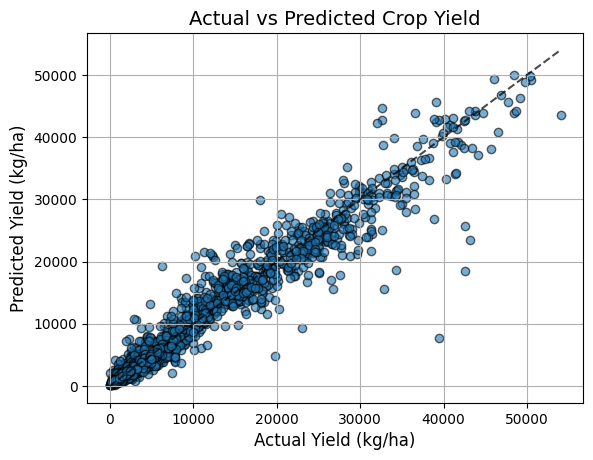

In [485]:
# Plot actual vs predicted yield
fig, ax = plt.subplots()
ax.scatter(test_df["yield_actual"], test_df["yield_predicted"], edgecolors=(0, 0, 0), alpha=0.6)

# labels and title
ax.set_xlabel('Actual Yield (kg/ha)', fontsize=12)
ax.set_ylabel('Predicted Yield (kg/ha)', fontsize=12)
ax.set_title("Actual vs Predicted Crop Yield", fontsize=14)
ax.grid(True)

# add reference line
lims = [min(test_df["yield_actual"].min(), test_df["yield_predicted"].min()), 
        max(test_df["yield_actual"].max(), test_df["yield_predicted"].max())]
ax.plot(lims, lims, 'k--', alpha=0.7)

plt.show()

### Conclusion

In [491]:
varimp = {
    'imp': rf_model.feature_importances_,
    'names': df_encoded.columns[df_encoded.columns != "hg/ha_yield"]
}

Top 20 Features

C:\Users\glenn\AppData\Local\Temp\ipykernel_14456\630834408.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=df_imp, palette="vlag")


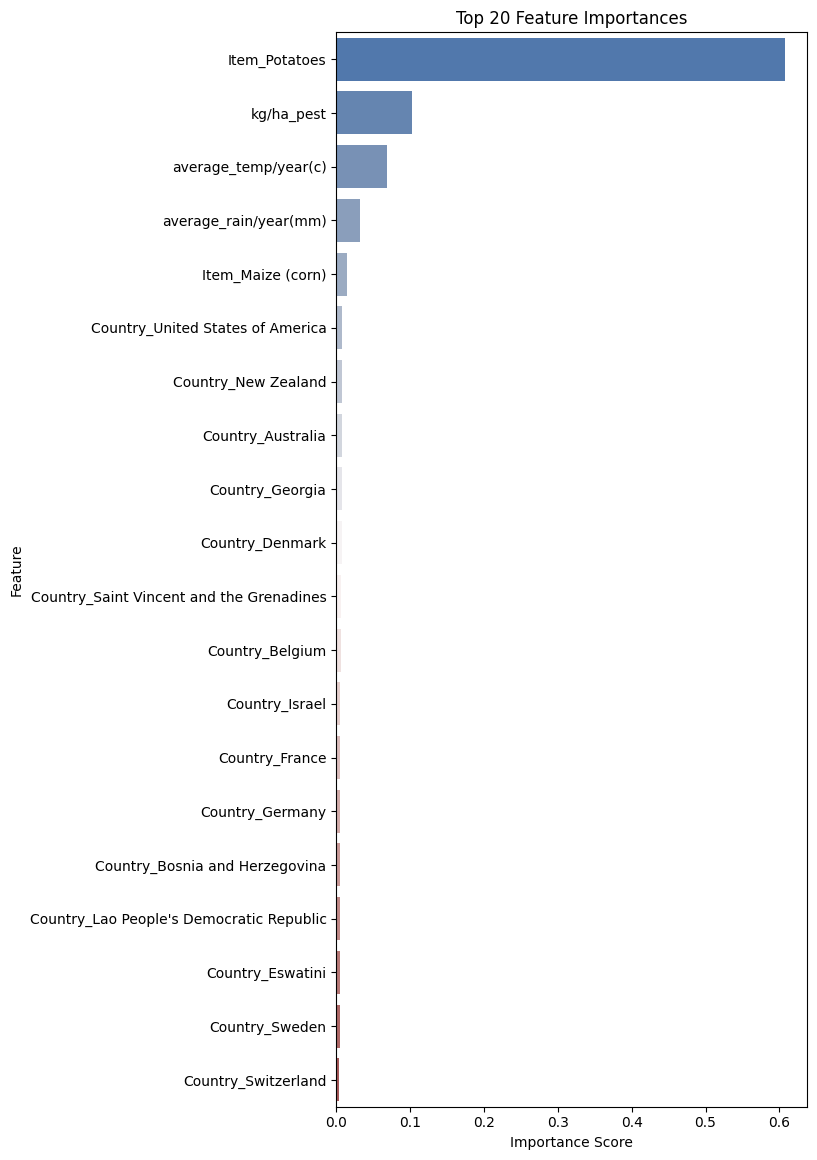

In [495]:
# Create DataFrame for feature importances
importances = rf_model.feature_importances_ 
feature_names = features.columns

# Create DataFrame
df_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sort and plot top 20
df_imp = df_imp.sort_values(by="Importance", ascending=False).head(20)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8.27, 11.7))
sns.barplot(x="Importance", y="Feature", data=df_imp, palette="vlag")
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


To understand which variables most influence crop yield predictions, we plotted the top 20 features based on their importance scores from the trained Random Forest Regressor model. 

From the graph, it’s evident that Item_Potatoes is by far the most influential predictor in the dataset which makes sense because there are many data points for it. It is then followed by kg/ha_pest, average_temp/year(c), and average_rain/year(mm). This suggests that both the type of crop, temperature and rainfall play crucial roles in determining yield. Pesticide usage (kg/ha_pest) also was as a strong predictor.

Country indicators, while included in the model, had lower importance, meaning that yield variation is better explained by crop-specific factors rather than just geographical factors.

Boxplot for yields of each item

C:\Users\glenn\AppData\Local\Temp\ipykernel_14456\1439941747.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_df, x="Item", y="kg/ha_yield", palette="Set2")


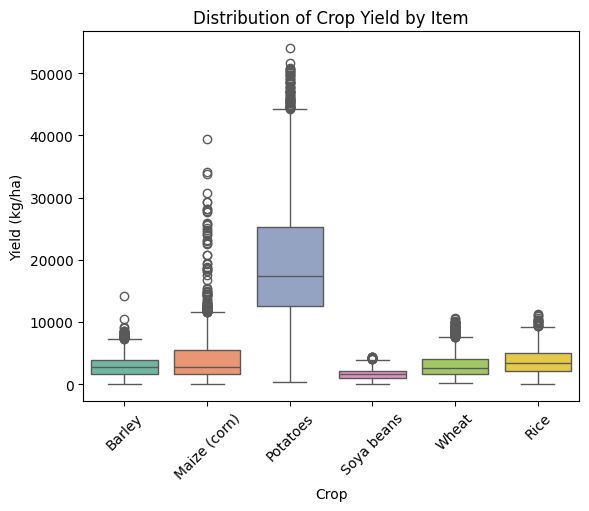

In [498]:
sns.boxplot(data=final_df, x="Item", y="kg/ha_yield", palette="Set2")
plt.xticks(rotation=45)
plt.title("Distribution of Crop Yield by Item")
plt.xlabel("Crop")
plt.ylabel("Yield (kg/ha)")
plt.show()